In [1]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable


# 확률분포의 추정
데이터가 어떤 확률변수로부터 실현된 표본 가정

확률변수의 분포를 알아내기 위한 작업

1. 어떤 분포를 따르는지 알아낸다.
2. 확률분포의 모수 값을 추정

데이터의 형태, 값에 따라 분포를 예상할 수 있다.
- 데이터가 0이나 1밖에 없으면 : 베르누이분포
- 데이터가 카테고리 값 : 카테고리분포
- 0과 1 사이의 실수 값 : 베타분포
- 데이터가 0또는 양수 : 감마분포, 로그정규분포, F분포 등등
- 데이터가 제한이 없는 실수 : 정규분포, T분포 등등



In [2]:
from sklearn.datasets import load_boston
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([dfX, dfy], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


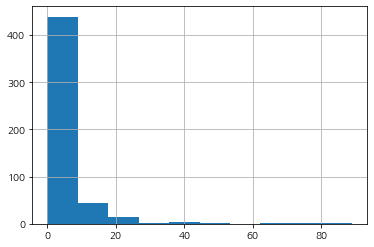

In [3]:
import matplotlib.pyplot as plt
df['CRIM'].hist()
plt.show() 

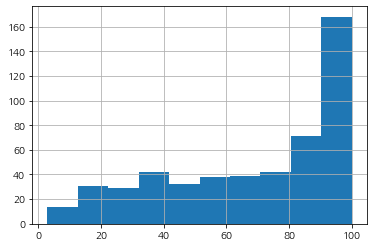

In [4]:
df['AGE'].hist()
plt.show() 

## 모수 추정 방법
어떤 모집단의 모수를 추정하는 작업
- 모멘트 방법
- 최대가능도 추정법
- 베이즈 추정법

### 모멘트 방법
표본자료에 대한 표본 모멘트가 모집단의 모멘트와 동일하다는 가정

표본 모멘트를 통해서 모수를 추정

$$μ= E[X]= \hat{x} = \frac{1}{N}\Sigma_{i=1}^N{x_i}$$

$$σ^2 = E[(X-μ)^2] = s^{-2}= \frac{1}{N-1}\Sigma_{i=1}^N(x_i-\hat{x})^2$$

#### 베르누이 분포의 모수 추정
$$E[X] = μ=\hat{x}=\frac{1}{N}\Sigma_{i=1}^N x_i = \frac{N_1}{N}$$


#### 정규분포의 모수 추정
$$E[X] = μ=\hat{x} = \frac{1}{N}\Sigma_{i=i}^N x_i $$

$$σ^2 = E[(X-μ)^2] = s^{-2}= \frac{1}{N-1}\Sigma_{i=1}^N(x_i-\hat{x})^2$$

#### 베타분포의 모수 추정
$$ E[X] = \frac{a}{a+b} = \hat{x}$$
$$ E[(X-μ)^2] = \frac{ab}{(a+b)^2(a+b+1)}=s^2$$

$$a = \hat{x} \left(\frac{\hat{x} ( 1-\hat{x})}{s^2} - 1 \right)$$
$$b = (1-\hat{x})\left(\frac{\hat{x}(1 - \hat{x})}{s^2}-1\right)$$


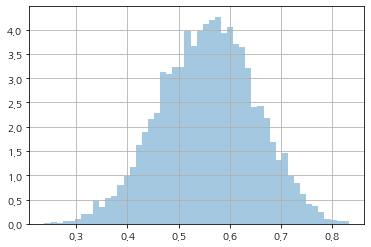

In [5]:
import scipy as sp
import scipy.stats
import numpy as np
import seaborn as sns
np.random.seed(0)
x = scipy.stats.beta(15, 12).rvs(10000)

sns.distplot(x, kde=False, norm_hist=True)
plt.grid()
plt.show()

In [6]:
def estimate_beta(x):
  x_bar = x.mean()
  s2 = x.var()
  a = x_bar*(x_bar*(1-x_bar)/s2-1)
  b = (1 - x_bar)*(x_bar*(1-x_bar)/s2-1)
  return a,b

params = estimate_beta(x)
print(params)

(15.346682046700685, 12.2121537049535)


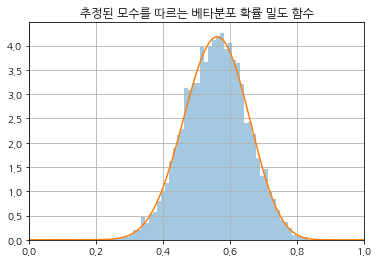

In [7]:
xx = np.linspace(0, 1, 1000)
sns.distplot(x, kde=False, norm_hist=True)
plt.plot(xx, scipy.stats.beta(params[0], params[1]).pdf(xx))
plt.xlim(0,1)
plt.title('추정된 모수를 따르는 베타분포 확률 밀도 함수')
plt.grid()
plt.show()

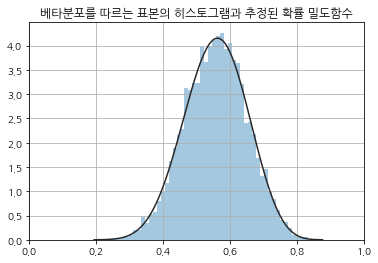

In [8]:
sns.distplot(x, kde=False, norm_hist=True, fit=scipy.stats.beta)
plt.xlim(0,1)
plt.title('베타분포를 따르는 표본의 히스토그램과 추정된 확률 밀도함수')
plt.grid()
plt.show()

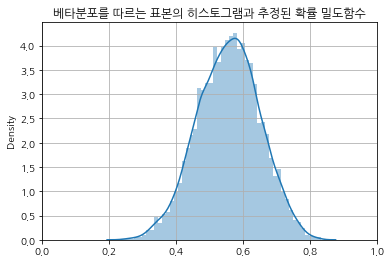

In [9]:
sns.distplot(x, kde=True, norm_hist=True)
plt.xlim(0,1)
plt.title('베타분포를 따르는 표본의 히스토그램과 추정된 확률 밀도함수')
plt.grid()
plt.show()

In [10]:
sns.displot?

Signature:
sns.displot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    weights=None,
    kind='hist',
    rug=False,
    rug_kws=None,
    log_scale=None,
    legend=True,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing distribution plots onto a FacetGrid.

This function provides access to several approaches for visualizing the
univariate or bivariate distribution of data, including subsets of data
defined by semantic mapping and faceting across multiple subplots. The
``kind`` parameter selects the approach to use:

- :func:`histplot` (with ``kind="hist"``; the default)
- :func:`kdeplot` (with ``kind="kde"``)
- :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)

Additionally, a :func:`rugplot` can be added to any kind of plot to show
individual 

### 최대 가능도 추정법
모멘트 추정은 보장이 되지 않는다. 모수값일 확률이 보장이 되지 않음   
최대 가능도 추정법 가장 가능성이 높은 모수를 찾는 방법   
베르누이, 카테고리, 정규, 다변수정규 분포에 대해서 최대 가능도 추정을 이용하여 모수를 찾아보겠습니다.

- 확률질량함수   
$$p(x;θ)$$

- 정규분포의 θ   
$$θ = (μ, σ^2)$$

- 베르누이 분포
$$θ = μ$$

- 이항분포
$$θ=(N,μ)$$

- 가능도함수(Likelihood function)
$$L(θ;x) = p(x;θ)$$

#### 정규분포
확률밀도함수
$$p(x;μ_0,σ^2) = \frac{1}{\sqrt{2πσ^2}}exp\left(-\frac{(x-μ_0)^2}{2σ^2}\right)$$

$$L(μ,σ^2;x_0) = \frac{1}{\sqrt{2πσ^2}}exp\left(-\frac{(x_0-μ_0)^2}{2σ^2}\right)$$

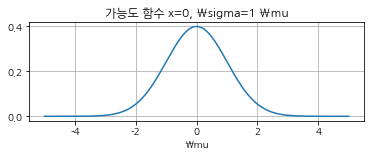

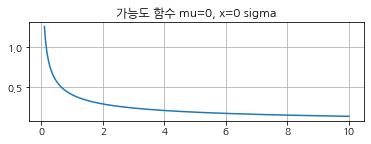

In [11]:
def likelihood_mu(mu):
  return scipy.stats.norm(loc=mu).pdf(0)

mus = np.linspace(-5, 5, 1000)
likelihood_mu = [likelihood_mu(m) for m in mus]

plt.subplot(211)
plt.plot(mus, likelihood_mu)
plt.title('가능도 함수 x=0, \sigma=1 \mu')
plt.xlabel('\mu')
plt.grid()
plt.show()

def likelihood_sigma2(sigma2):
  return scipy.stats.norm(scale=np.sqrt(sigma2)).pdf(0)

sigma2s = np.linspace(0.1, 10, 1000)
likelihood_sigma2 = [likelihood_sigma2(m) for m in sigma2s]

plt.subplot(212)
plt.plot(sigma2s, likelihood_sigma2)
plt.grid()
plt.title('가능도 함수 mu=0, x=0 sigma')
plt.show()


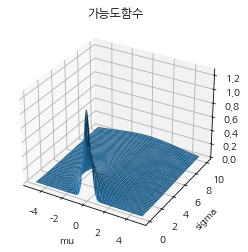

In [12]:
MU, SIGMA2 = np.meshgrid(mus, sigma2s)
L = np.exp(-MU**2/(2*SIGMA2))/np.sqrt(2*np.pi*SIGMA2)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(MU, SIGMA2, L, linewidth=0.1)
plt.grid()
plt.xlabel('mu')
plt.ylabel('sigma')
plt.title('가능도함수')
plt.show()

#### 베르누이 분포
확률질량함수
$$p(x;μ_0) = μ_0^x(1-μ_0)^{1-x}$$

가능도 함수
$$L(μ,x_0) = μ^{x_0}(1-μ)^{1-x_0}$$

- x_0 : 변수집단
- 0 <= \mu <= 1

### 최대가능도 추정법
Maximum Likelihood Estimation

$$\hat{θ}_{MLE} = argmax_θL(θ;x)$$

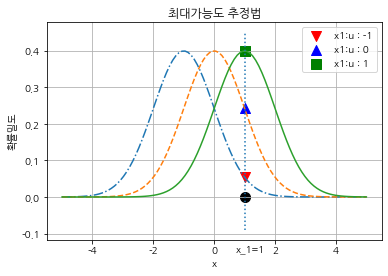

-1 0.05399096651318806
0 0.24197072451914337
1 0.3989422804014327


In [13]:
# x1=1 sigma=1
x = np.linspace(-5,5,100)

p1 = scipy.stats.norm(loc=-1).pdf(1)
p2 = scipy.stats.norm(loc=0).pdf(1)
p3 = scipy.stats.norm(loc=1).pdf(1)

plt.scatter(1, p1, s=100, c='r', marker='v',label='x1:u : -1')
plt.scatter(1, p2, s=100, c='b', marker='^',label='x1:u : 0')
plt.scatter(1, p3, s=100, c='g', marker='s',label='x1:u : 1')

plt.plot(x, scipy.stats.norm(loc=-1).pdf(x), ls='-.')
plt.plot(x, scipy.stats.norm(loc=0).pdf(x), ls='--')
plt.plot(x, scipy.stats.norm(loc=1).pdf(x), ls='-')

plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.09, 0.45, linestyle=':')
plt.text(1-0.3, -0.15, 'x_1=1')

plt.xlabel('x')
plt.ylabel('확률밀도')
plt.legend()
plt.title('최대가능도 추정법')
plt.grid()
plt.show()
print(-1,p1)
print(0,p2)
print(1, p3)

### 복수 표본 데이터의 가능도 함수

표본이 여러개일 경우
$$P_{{X_1}{X_2}{X_3}⋯{X_N}}(x1,x2,⋯,x_N;θ) = \prod_{i=1}^Np(x_i;θ)$$

정규분포로 {1, 0, -3} 주어졌을 때   
$$L(θ;x_1,x_2,x_3)=\mathcal{N}(x_1,x_2,x_3)$$
$$L(μ,σ^2;x_0) = \frac{1}{\sqrt{2πσ^2}}exp\left(-\frac{(x_0-μ_0)^2}{2σ^2}\right)$$

$$ = \frac{1}{(2πσ^2)^\frac{3}{2}}exp\left(-\frac{3(μ+\frac{2}{3})^2 + \frac{36}{3}}{2σ^2}\right)$$

$$\hat{μ}_{MLE} = -\frac{2}{3}$$

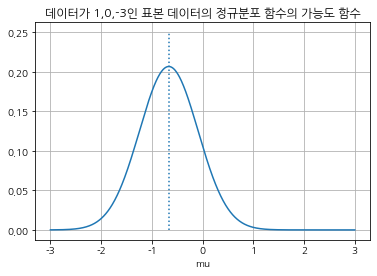

In [14]:
mu = np.linspace(-3, 3, 1000)
sigma2 = 1
def likelihood(mu):
  return (2*np.pi*sigma2)**(3/2)*np.exp(-(3*mu**2+4*mu+10)/(2*sigma2))

li = likelihood(mu)
plt.plot(mu, li)
plt.vlines(-2/3, 0, 0.25, linestyles=":")
plt.xlabel('mu')
plt.title('데이터가 1,0,-3인 표본 데이터의 정규분포 함수의 가능도 함수')
plt.grid()
plt.show()

### 베르누이분포
표본집단이 {1,0,1}일 때
$$L(μ;x1=1,x2=0,x3=1)$$
$$L(μ,x_0) = μ^{x_0}(1-μ)^{1-x_0}$$
$$μ^1(1-μ)^{1-1}μ^0(1-μ)^{1-0}μ^1(1-μ)^{1-1}$$
$$=-μ^3+\mu^2$$

### 카테고리분포 최대 가능도 모수 추정

$$\mu = (\mu_1,⋯,\mu_k)$$
$$L(μ_1,⋯,\mu_K; x_1,⋯,x_N)=\prod_{i=1}^N \prod_{k=1}^K \mu_k^{x_{i,k}}$$

1. 미분을 할 수 있게 로그
2. 미분 값이 0이 되는 값 도출

$$μ_k = \frac{N_K}{N}$$

최대 가능도 추정법에 의한 카테고리 분포의 모수는 각 범주 값이 나온 횟수와 시행횟수의 비율

### 정규분포 최대 가능도 모수 추정
$$\mu=\frac{1}{N}Σx_i=\bar{x}$$
$$σ^2=s^2$$
$$s^2 = \frac{1}{N}\Sigma{(x-\bar{x})^2}$$

최대가능도 추정법에 의한 정규분포의 기댓값은 표본평균과 같다.

분산은 표본분산과 같다.

### 베이즈 추정법

베이즈 추정법은 주어진 데이터
$$X = {x_1,⋯x_N}$$
모수의 조건부 확률분포를 계산하는 작업
$$p(μ|x_1,⋯,x_N)$$   
$$p(μ|x_1,⋯,x_N) = \frac{p(x_1,⋯,x_N|μ)⋅p(\mu)}{p(x1,⋯,x_N)}=p(x_1,⋯,x_N|μ)⋅p(\mu)$$

- $p(μ|x_1,⋯,x_N)$ : 표본 x가 나왔을 때 μ의 분포   
- $p(x_1,⋯,x_N|μ)$ : 가능도 분포(모수가 주어졌을 때 X가 나올 확률)   
- $p(\mu)$ : 사전분포(아무런 정보가 없을 경우 Beta(1,1)인 균일 분포 혹은 평균이 0인 정규분포를 사용할 수 있다.)

- 모수적방법(Parametric)
      다른 확률분포를 활용하여 모수의 분포를 나타내는 방법
      모수의 확률분포함수의 모수를 구하는 방법(hyper-parameter)

- 비모수적방법(Non-Parametric)
      모수의 분포와 동일한 분포를 가지는 표본집단을 통해 히스토그램, 최빈값을 활용해서 분포를 표현

### 베르누이 분포의 모수 추정

$$p(\mu)=\mu^{a-1}(a-\mu)^{b-1} \quad (a=1, b=1)$$
$$p(x_1,⋯,x_N|μ) = \prod_{i=1}^N\mu^{x_i}(1-\mu)^{1-x_i}$$

$$p(μ|x_1,⋯,x_N) = p(x_1,⋯,x_N|μ)p(μ)$$
$$ = \prod_{i=1}^N\mu^{x_i}(1-\mu)^{1-x_i}⋅\mu^{a-1}(a-\mu)^{b-1}$$
$$ = \mu^{N_1+a-1}(1-\mu)^{Σ(1-x_i)+b-1}$$
$$ = μ^{N1+a-1}(1-μ)^{N_0+b-1}$$
$$ = μ^{a'-1}(1-μ)^{b'-1}$$

$$ a' = N_1+a$$
$$ b' = N_0+b$$

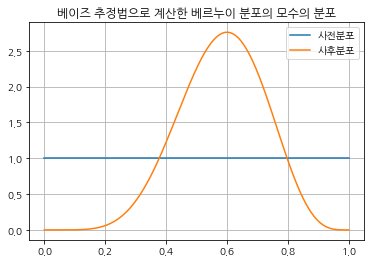

In [15]:
# mu = 0.6
# X = {1,1,1,1,1,1,0,0,0,0}
xx = np.linspace(0,1,1000)
a0 = 1
b0 = 1
plt.plot(xx, scipy.stats.beta(a0,b0).pdf(xx), label='사전분포')
a1, b1 = 7,5
plt.plot(xx, scipy.stats.beta(a1,b1).pdf(xx), label='사후분포')
plt.title('베이즈 추정법으로 계산한 베르누이 분포의 모수의 분포')
plt.legend()
plt.grid()
plt.show()

초기 추정 : 모드 = 모름


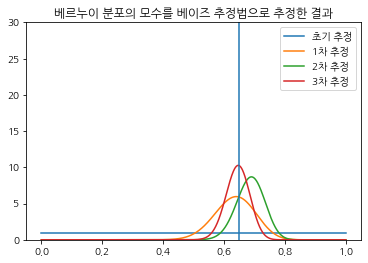

In [16]:
mu0 = 0.65
a,b = 1, 1
print('초기 추정 : 모드 = 모름')

xx = np.linspace(0, 1, 1000)
plt.plot(xx, scipy.stats.beta(a,b).pdf(xx), label='초기 추정')

np.random.seed(0)

for i in range(3):
  x = scipy.stats.bernoulli(mu0).rvs(50)
  N0, N1 = np.bincount(x, minlength=2)
  a, b = a + N1, b + N0
  plt.plot(xx, scipy.stats.beta(a,b).pdf(xx), label=f'{i+1}차 추정')

plt.vlines(0.65, ymin=0, ymax=30)
plt.ylim(0,30)
plt.legend()
plt.title('베르누이 분포의 모수를 베이즈 추정법으로 추정한 결과')
plt.show()

### 카테고리 분포의 모수 추정

카테고리 갯수가 K개인 모수 μ추정   
카테고리 분포의 모수의 각 원소는 0 ~ 1의 값을 가짐

$$p(μ) = \prod_{k=1}^K{μ_k}^{a_k-1}$$   
$$p(x_1,⋯,x_N|μ) = \prod_{i=1}^N\prod_{k=1}^K{μ_k}^{x_{i,k}}$$   
$$p(μ|x_1,⋯,x_N) = p(x_1,⋯,x_N|μ)p(μ) = \prod_{i=1}^N\prod_{k=1}^K{μ_k}^{x_{i,k}}⋅\prod_{k=1}^K{μ_k}^{a_k-1}$$   
$$ = \prod_{k=1}^Kμ^{\Sigma_{i=1}^N{x_i,k}+a_k - 1} = \prod_{k=1}^Kμ^{N_k+a_k-1}$$   
$$ = \prod_{k=1}^Kμ^{a'_k-1}$$   

$$a'_k = N_k + a_k$$

In [17]:
def plot_dirichlet(alpha, n):
    def project(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return np.dstack([(x-n12).dot(m1), (x-n12).dot(m2)])[0]

    def project_reverse(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return x[:, 0][:, np.newaxis] * m1 + x[:, 1][:, np.newaxis] * m2 + n12

    eps = np.finfo(float).eps * 10
    X = project([[1-eps, 0, 0], [0, 1-eps, 0], [0, 0, 1-eps]])

    import matplotlib.tri as mtri

    triang = mtri.Triangulation(X[:, 0], X[:, 1], [[0, 1, 2]])
    refiner = mtri.UniformTriRefiner(triang)
    triang2 = refiner.refine_triangulation(subdiv=6)
    XYZ = project_reverse(
        np.dstack([triang2.x, triang2.y, 1-triang2.x-triang2.y])[0])

    pdf = sp.stats.dirichlet(alpha).pdf(XYZ.T)
    plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
    plt.axis("equal")
    plt.title("정규분포 확률변수의 모수를 베이즈 추정법으로 추정한 결과: {} 추정".format(n))
    plt.show()

mu0 = np.array([0.3, 0.5, 0.2])

np.random.seed(0)

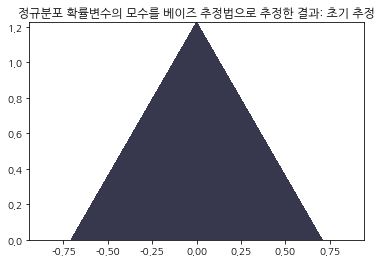

In [18]:
a0 = np.ones(3)  # [1,1,1]
plot_dirichlet(a0, '초기')

카테고리 수 N1=[10 32  8]
하이퍼 모수 a : [0.2  0.64 0.16]


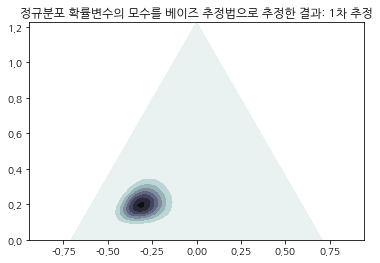

In [19]:
x1 = np.random.choice(3, 50, p=mu0)
N1 = np.bincount(x1, minlength=3)
a1 = a0 + N1

print(f'카테고리 수 N1={N1}')
print(f'하이퍼 모수 a : {(a1-1)/(a1.sum()-3)}')

plot_dirichlet(a1, '1차')

카테고리 수 N2=[24 19  7]
하이퍼 모수 a : [0.34 0.51 0.15]


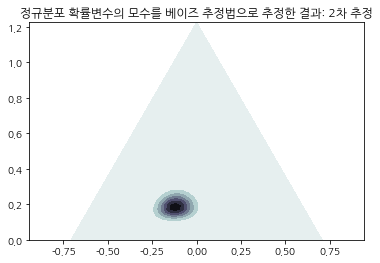

In [20]:
x2 = np.random.choice(3, 50, p=mu0)
N2 = np.bincount(x2, minlength=3)
a2 = a1 + N2

print(f'카테고리 수 N2={N2}')
print(f'하이퍼 모수 a : {(a2-1)/(a2.sum()-3)}')

plot_dirichlet(a2, '2차')

카테고리 수 N2=[27 52 21]
하이퍼 모수 a : [0.305 0.515 0.18 ]


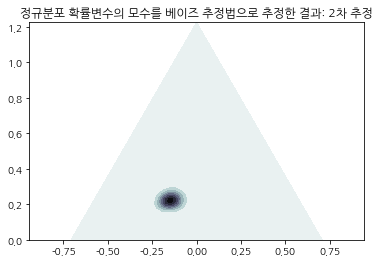

In [21]:
x3 = np.random.choice(3, 100, p=mu0)
N3 = np.bincount(x3, minlength=3)
a3 = a2 + N3

print(f'카테고리 수 N2={N3}')
print(f'하이퍼 모수 a : {(a3-1)/(a3.sum()-3)}')

plot_dirichlet(a3, '2차')

### 정규 분포 모수 추정

$$p(μ) = N(μ_0, σ_0^2) = \frac{1}{\sqrt{2πσ^2}}exp\left(-\frac{(μ-μ_0)^2}{2σ^2}\right)$$

$$p(x_1,⋯,x_N|μ) = \prod_{i=1}^NN(x_i|μ) = \prod_{i=1}^N\frac{1}{\sqrt{2πσ^2}}exp\left(-\frac{(x_i-μ_0)^2}{2σ^2}\right)$$

$$p(μ|x_1,⋯,x_N) = p(x_1,⋯,x_N|μ)p(μ) =$$


<!-- $$exp\left(-\frac{(μ-μ'_0)^2}{2σ'_0^2}\right)$$ -->

$$\mu'_0= \frac{σ^2}{Nσ_0^2+σ^2}μ_0 + \frac{Nσ_0^2}{Nσ_0^2+σ^2}\frac{
  Σx_i}{N}$$

$$ \frac{1}{{σ'_0}^2} = \frac{1}{σ_0^2} + \frac{N}{σ^2}$$

0차 추정 평균: 1.9668881512137122, 0차 추정 분산: 0.007936507936507936
1차 추정 평균: 1.9417952117835626, 1차 추정 분산: 0.00398406374501992
2차 추정 평균: 1.9633662274320023, 2차 추정 분산: 0.0026595744680851063
3차 추정 평균: 1.9627667272176517, 3차 추정 분산: 0.001996007984031936
4차 추정 평균: 1.9618380581091137, 4차 추정 분산: 0.001597444089456869


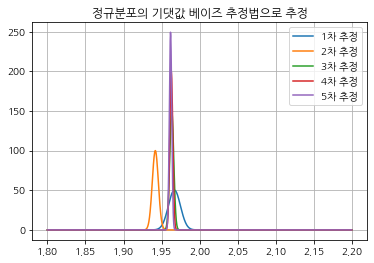

In [24]:
mu, sigma2 = 2,4
mu0, sigma20 = 0,1
xx = np.linspace(1.8,2.2, 1000)
N = 500

for i in range(5):
  x = scipy.stats.norm(mu).rvs(N)
  mu0 = sigma2/(N*sigma20 + sigma2)*mu0 + (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
  sigma20 = 1/(1/sigma20 + N/sigma2)
  plt.plot(xx, scipy.stats.norm(mu0, sigma20).pdf(xx), label=f'{i+1}차 추정')
  print(f'{i}차 추정 평균: {mu0}, {i}차 추정 분산: {sigma20}')
plt.legend()
plt.grid()
plt.title('정규분포의 기댓값 베이즈 추정법으로 추정')
plt.show()
